In [19]:
import torch
import torch.nn as nn
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) * 
            (x + 0.044715 * torch.pow(x, 3))
        ))

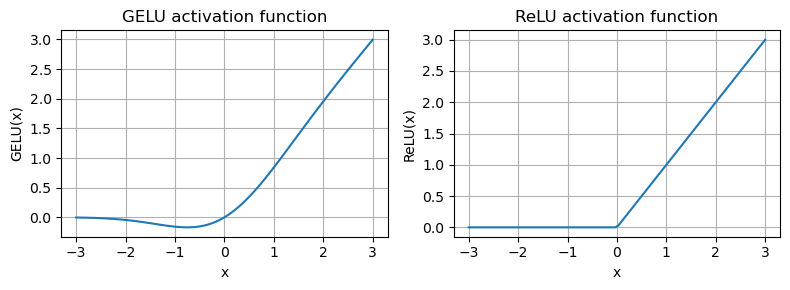

In [20]:
import matplotlib.pyplot as plt
from torch.nn import GELU

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
# In the bove graph, we can see that GELU is smooth and differntiable everywhere, while ReLU has a sharp corner at x=0. This smoothness can lead to better performance in some neural network architectures.
# Additionally, GELU allows for small negative values, which can help maintain a richer representation of the input data compared to ReLU, which zeroes out all negative values.    
# IN Gelu the nuerons are not getting zero so the neurons provide atleast some where it helps in the learning process
# Gelu activation function also preserves the dimensions which will be needed in the feed forward method

In [21]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),  # Expansion
            nn.GELU(),                                      # Activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"])   # Contraction
        )

    def forward(self, x):
        return self.layers(x)

# Example
GPT_CONFIG_124M = {"emb_dim": 768}
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768)
out = ffn(x)
print(out.shape)


torch.Size([2, 3, 768])
